<a href="https://colab.research.google.com/github/tonkatsu-ika/simple_deep_learning/blob/master/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple　Deep Learning

データの読み込み

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


データの前処理

In [6]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


訓練データとテスト用データ

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)

(112, 4)


## モデルの構築

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_5 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_6 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

## 学習

In [12]:
history = model.fit(x_train, t_train, nb_epoch=30, batch_size=8)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Epoch 1/30





112/112 [==============================] - 1s 5ms/step - loss: 1.1676 - acc: 0.3929
Epoch 2/30
112/112 [==============================] - 0s 193us/step - loss: 1.0167 - acc: 0.5000
Epoch 3/30
112/112 [==============================] - 0s 153us/step - loss: 0.9110 - acc: 0.5804
Epoch 4/30
112/112 [==============================] - 0s 163us/step - loss: 0.8225 - acc: 0.8393
Epoch 5/30
112/112 [==============================] - 0s 160us/step - loss: 0.7409 - acc: 0.8661
Epoch 6/30
112/112 [==============================] - 0s 181us/step - loss: 0.6715 - acc: 0.8661
Epoch 7/30
112/112 [==============================] - 0s 191us/step - loss: 0.6154 - acc: 0.8750
Epoch 8/30
112/112 [==============================] - 0s 171us/step - loss: 0.5681 - acc: 0.8839
Epoch 9/30
112/112 [==============================] - 0s 177us/step - loss: 0.5295 - acc: 0.8839
Epoch 10/30
112/112 [==============================] - 0s 180us/step - loss: 0.4959 - acc: 0.8839
Epoch 11/30
112/112 [====

## 学習の推移

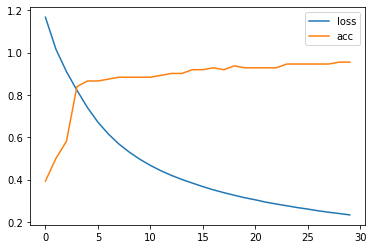

In [14]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['acc']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.legend()
plt.show()

## 評価

In [15]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

38/38 [==============================] - 0s 878us/step
0.27300458872004557 0.8947368421052632


## 予測

In [16]:
model.predict(x_test)

array([[1.84356458e-02, 8.23792875e-01, 1.57771438e-01],
       [9.79563057e-01, 1.52436020e-02, 5.19330660e-03],
       [1.62240453e-02, 4.20552850e-01, 5.63223064e-01],
       [4.20009419e-02, 6.60774827e-01, 2.97224253e-01],
       [6.42043576e-02, 7.10582733e-01, 2.25212887e-01],
       [7.79634267e-02, 8.11144173e-01, 1.10892415e-01],
       [6.33385591e-03, 1.15055084e-01, 8.78611088e-01],
       [3.05800624e-02, 4.93888438e-01, 4.75531578e-01],
       [1.10268258e-02, 1.43351361e-01, 8.45621824e-01],
       [2.96009798e-03, 2.01339915e-01, 7.95699954e-01],
       [2.98753195e-02, 2.71278441e-01, 6.98846281e-01],
       [4.02967999e-04, 6.11355081e-02, 9.38461483e-01],
       [1.08534552e-03, 7.60233849e-02, 9.22891259e-01],
       [9.77609396e-01, 1.69448424e-02, 5.44583844e-03],
       [9.59954202e-01, 3.36859152e-02, 6.35987287e-03],
       [1.32200459e-03, 6.30823970e-02, 9.35595572e-01],
       [9.53207254e-01, 3.53793167e-02, 1.14134680e-02],
       [5.94910458e-02, 8.33318

## 保存

In [17]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')